## Observations and Insights 

In [1]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
# %matplotlib notebook
# Version 2 - use this one
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merge_df["Mouse ID"].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
len1 = len(merge_df)
len1

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 

dupcheck = pd.DataFrame(merge_df)
dupcheck = dupcheck[dupcheck.duplicated(subset=["Mouse ID","Timepoint"],keep="first")]
len(dupcheck)

5

In [5]:
dupcheck

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop([909,911,913,915,917])
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# double-check to be sure there are no dups. Commented out after checking
# dupcheck2 = clean_df[clean_df.duplicated(subset=["Mouse ID","Timepoint"],keep="first")]
# len(dupcheck2)
# Test
# Checking the number of mice in the clean DataFrame.
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
clean_df["Mouse ID"].nunique()

249

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
    # for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: +
summary = clean_df.groupby(["Drug Regimen"], as_index=False)
summary2 = summary.agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})


# mean, median, variance, standard deviation, and SEM of the tumor volume. 
print(summary2)


# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame(summary2)
summary_df

  Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.393463  50.909965  43.138803  6.568014  0.525862
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398


Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.393463  50.909965  43.138803  6.568014  0.525862
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [13]:
bar1_dta = clean_df.groupby(["Drug Regimen"])
bar1_dta = bar1_dta.agg({"Timepoint": "count"})
bar1_dta = bar1_dta.rename(columns={"Timepoint": "Timepoint (count)"})
bar1_dta = bar1_dta.reset_index()
bar1_df = pd.DataFrame(bar1_dta)

index = bar1_df.index
number_of_rows = len(index)
bar1_df

,Drug Regimen,Timepoint (count)
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,156
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


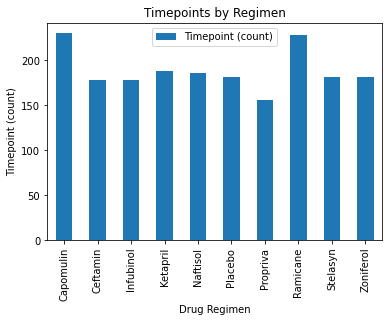

In [14]:
# https://re-thought.com/how-to-visualise-data-with-python/ python only

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar1_df.plot.bar()
x_axis = np.arange(number_of_rows)
plt.title('Timepoints by Regimen')
plt.ylabel('Timepoint (count)')
plt.xlabel('Drug Regimen')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, bar1_df["Drug Regimen"], rotation='vertical')
plt.show()

<BarContainer object of 10 artists>

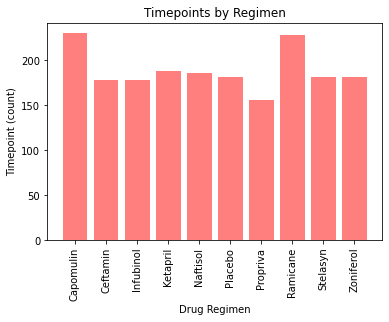

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(number_of_rows)
users = bar1_df["Timepoint (count)"]
plt.title('Timepoints by Regimen')
plt.ylabel('Timepoint (count)')
plt.xlabel('Drug Regimen')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, bar1_df["Drug Regimen"], rotation='vertical')
plt.bar(x_axis, users, color='r', alpha=0.5, align="center")

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pie_data = clean_df.groupby("Sex", as_index=False)["Mouse ID"].nunique()
pie_data.columns = ["Sex","Count"]
# pie_data = pie_data.agg({"Mouse ID": "nunique"})
pie_data = pd.DataFrame(pie_data)

# labels=pies
pie_data



,Sex,Count
0,Female,124
1,Male,125


This chart displays the count of mice by gender. 


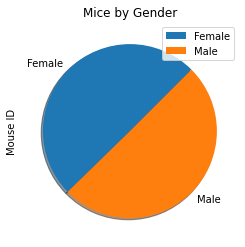

In [65]:
clean_df.groupby(['Sex']).nunique().plot(kind='pie', y='Mouse ID', shadow = True,  startangle=45, title = "Mice by Gender" )
# https://kontext.tech/column/code-snippets/402/pandas-dataframe-plot-pie-chart
print("This chart displays the count of mice by gender. ")

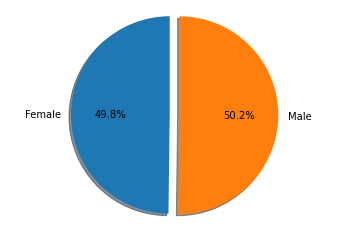

This chart displays the count of mice by gender. 


In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = pie_data["Sex"]
sizes = pie_data["Count"]
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()
print("This chart displays the count of mice by gender. ")

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

tumor_vol = clean_df[clean_df["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol", "Ceftamin"])]
tumor_vol.head()                

# Start by getting the last (greatest) timepoint for each mouse
tumor_vol2 = tumor_vol.groupby(["Mouse ID"])
tumor_vol2 = tumor_vol2.agg({"Timepoint":"max"})
tumor_vol2 = tumor_vol2.reset_index()
tumor_vol2.head()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol3 = pd.merge(tumor_vol2, clean_df, on=["Mouse ID", "Timepoint"]) 
tumor_vol3.columns = [c.replace(' ', '_') for c in tumor_vol3.columns]
tumor_vol3.columns = [c.replace('(', '') for c in tumor_vol3.columns]
tumor_vol3.columns = [c.replace(')', '') for c in tumor_vol3.columns]
tumor_vol3.head()


,Mouse_ID,Timepoint,Drug_Regimen,Sex,Age_months,Weight_g,Tumor_Volume_mm3,Metastatic_Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [22]:
# Use tumor_vol3 for the dataframe
# Put treatments into a list for for loop (and later for plot labels)
  
drug_list = []

for row in tumor_vol3["Drug_Regimen"]:
    if row not in drug_list:
        drug_list.append(row)
print(f"Drug regimen: {drug_list}")


# Create empty list to fill with tumor vol data (for plotting)
volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for med in drug_list:
    tumor_volume = tumor_vol3["Tumor_Volume_mm3"].loc[tumor_vol3["Drug_Regimen"]== med]
    # add subset
    volume_data.append(tumor_volume)
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"For {med}, the interquartile range is {iqr}.")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"For {med}, Values below {lower_bound} could be outliers.")
    print(f"For {med}, Values above {upper_bound} could be outliers.") 
    

Drug regimen: ['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']
For Infubinol, the interquartile range is 11.477135160000003.
For Infubinol, Values below 36.83290494999999 could be outliers.
For Infubinol, Values above 82.74144559000001 could be outliers.
For Ceftamin, the interquartile range is 15.577752179999997.
For Ceftamin, Values below 25.355449580000002 could be outliers.
For Ceftamin, Values above 87.66645829999999 could be outliers.
For Ramicane, the interquartile range is 9.098536719999998.
For Ramicane, Values below 17.912664470000003 could be outliers.
For Ramicane, Values above 54.30681135 could be outliers.
For Capomulin, the interquartile range is 7.781863460000004.
For Capomulin, Values below 20.70456164999999 could be outliers.
For Capomulin, Values above 51.83201549 could be outliers.


<ipython-input-23-b69037cd3a10>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(drug_list)


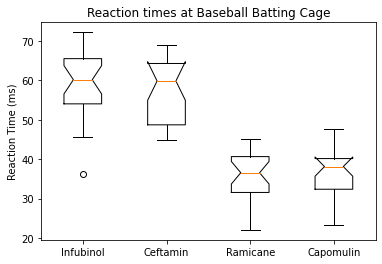

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1,ax1 = plt.subplots()
ax1.set_title('Reaction times at Baseball Batting Cage')
ax1.set_ylabel('Reaction Time (ms)')
ax1.set_xticklabels(drug_list)
ax1.boxplot(volume_data, drug_list)
plt.show()

## Line and Scatter Plots

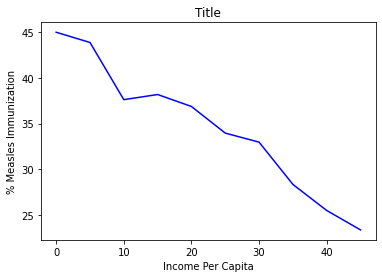

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
rslt_df = clean_df[(clean_df['Drug Regimen'] == "Capomulin") & (clean_df["Mouse ID"] == "s185")]
rslt_df1 = rslt_df[["Timepoint","Tumor Volume (mm3)"]]
rslt_df1

time = rslt_df1["Timepoint"]
tumor = rslt_df1["Tumor Volume (mm3)"]
# Plot the world average as a line chart
mouse_s185, = plt.plot(time, tumor, color="blue", label="World Average" )


# Create a legend for our chart
# plt.legend(handles=[tumor], loc="best")
# plt.legend(handles=[tumor], loc="best")
plt.xlabel('Income Per Capita')
plt.ylabel('% Measles Immunization')
plt.title('Title')
plt.show()
# Show the chart

plt.show()

In [31]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Note - 
scatter_df = clean_df[(clean_df['Drug Regimen'] == "Capomulin")]
scatter_df1= scatter_df[["Mouse ID","Weight (g)","Tumor Volume (mm3)"]]
scatter_df2 = scatter_df1.groupby(["Mouse ID"])
scatter_df2 = scatter_df2.agg({"Weight (g)":"mean", "Tumor Volume (mm3)":"mean"})

scatter_df2

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


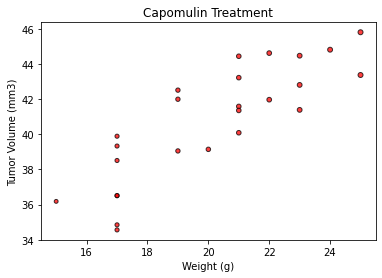

In [33]:

x_axis = scatter_df2["Weight (g)"]
data = scatter_df2["Tumor Volume (mm3)"]
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment')
plt.show()

## Correlation and Regression

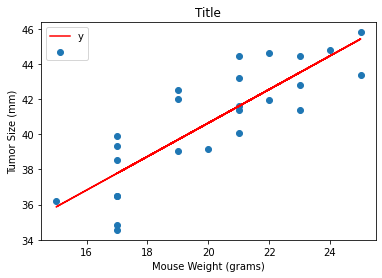

The correlation between mouse weight and tumor size is(0.8419363424694719, 1.3225722434712586e-07)
The regression equation is y = 0.95x + 21.55. 
The r-squared is: 0.7088568047708723 with a p value of 1.3225722434712404e-07.


In [51]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = scatter_df2["Weight (g)"]
tumor_size = scatter_df2["Tumor Volume (mm3)"]
correlation = st.pearsonr(mouse_weight,tumor_size)


# Add the linear regression equation and line to plot
x_values = mouse_weight
y_values = tumor_size 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = ("y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,5),fontsize=15,color="red")
plt.xlabel('Mouse Weight (grams)')
plt.ylabel('Tumor Size (mm)')
plt.title('Title')
plt.legend(line_eq)
plt.show()
print(f"The correlation between mouse weight and tumor size is{correlation}")
print(f"The regression equation is {line_eq}. ")
print(f"The r-squared is: {rvalue**2} with a p value of {pvalue}.")